<div style="font-size: 30px">
The Challenge 

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

The challenge is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 
[From the Kaggle wepsite](https://www.kaggle.com/c/titanic)

Kaggle has provided two datasets, 'train.csv' and 'test.csv'. Train.csv contains information of a subset of the passengers on board and the fact that whether they survived or not. The challenge is to predict whether the passengers in the 'test.csv' dataset survived or died.



<div style="font-size: 25px">
Goal 

My goal is to do an analysis of the Titanic shipwreck and build a simple machine learning model to predict the survival of passengers. In order to achieve this, I'm following the below steps:

- Exploring the data
- Cleansing the data
- Analyzing the data by descriptive analysis and by visualisation (with Tableau)
- Wrangling, preparing the data for the machine learning models
- Predicting the outcome


In [61]:
# importing the necessary libraries
import numpy as np
import pandas as pd

In [62]:
# Reading the train.csv file into a pandas DataFrame:
train_table = pd.read_csv('train.csv')

<div style="font-size: 19px">
   Exploring the data we have


In [63]:
train_table.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
# glancing at the datatypes of each feature and the missing values
train_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div style="font-size: 19px">
Cleaning the data as preparation for the analysis

In [65]:
# Deleting Cabin as it has over 600 missing values and also deleting Ticket as it probably does not have any correlation with survival
train_table = train_table.drop(columns=['Cabin', 'Ticket'])

# now we can drop all the rows which contain missing values (only two columns, Age and Embarked has missing values)
train_table = train_table.dropna()

<div style="font-size: 19px">
Analyze by describing the data

In [66]:
# Review the distribution of the features, first the categorical features:
train_table.describe(include=[object])

,Name,Sex,Embarked
count,712,712,712
unique,712,2,3
top,"Wright, Mr. George",male,S
freq,1,453,554


The Name column have unique values in the dataset (total passangers are 712 after cleaning the dataset)

Sex has two unique values (male, female), more male (top = male) as 63.6% (freq = 453 / count = 712) of the passangers being male

Embarked takes on 3 values (C = Cherbourg, Q = Queenstown, S = Southampton), with Southampton being the port used by 77.8% passangers (freq = 554)


In [67]:
# Then the numerical features
train_table.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


40.4% of the passengers survived (mean = 0.404494)

About 25%-25% of the passangers had 1st and 2nd class tickets and around 50% was travelling with 3rd class tickets (25th, 50th, and 75th percentiles)

The passengers' age varied greatly between under 1 to 80, but half of the passenger were 28 or under

The SibSp column contains the number of siblings/spouses, 
and the Parch column the number of parents/children the passanger had aboard the Titanic

The majority (around 75%) of passangers travelled with 1 or no relative

The ticket price went up to 512 USD, but 75% of the passangers paid less than 34 USD for their ticket

In [68]:
# Overviewing the survival rate by each feature
# Survived by sex in %
train_table[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.752896
1,male,0.205298


In [69]:
# Survived by the location of embarkment in %
train_table[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.607692
2,S,0.362816
1,Q,0.285714


In [70]:
# Survived by class in %
train_table[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.652174
1,2,0.479769
2,3,0.239437


In [71]:
# Survived by number of siblings/spouses in %
train_table[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.530055
2,2,0.440000
0,0,0.368870
3,3,0.333333
4,4,0.166667
5,5,0.000000


In [72]:
# Survived by number of parents/childrens in %
train_table[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
2,2,0.573529
1,1,0.554545
0,0,0.354528
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
#Fare and Age takes on too many values to have a good overview, so I will first group the values into bins, #and also will use the new groups for the model later on 

<div style="font-size: 19px">
Analyze by visualizing data

In [73]:
# writing cleaned train table into a csv file for Tableau visualisation
train_table.to_csv('train_cleaned.csv', index=False)

To better understand the data and the correlation between survival and the different features, let's visualise it. 

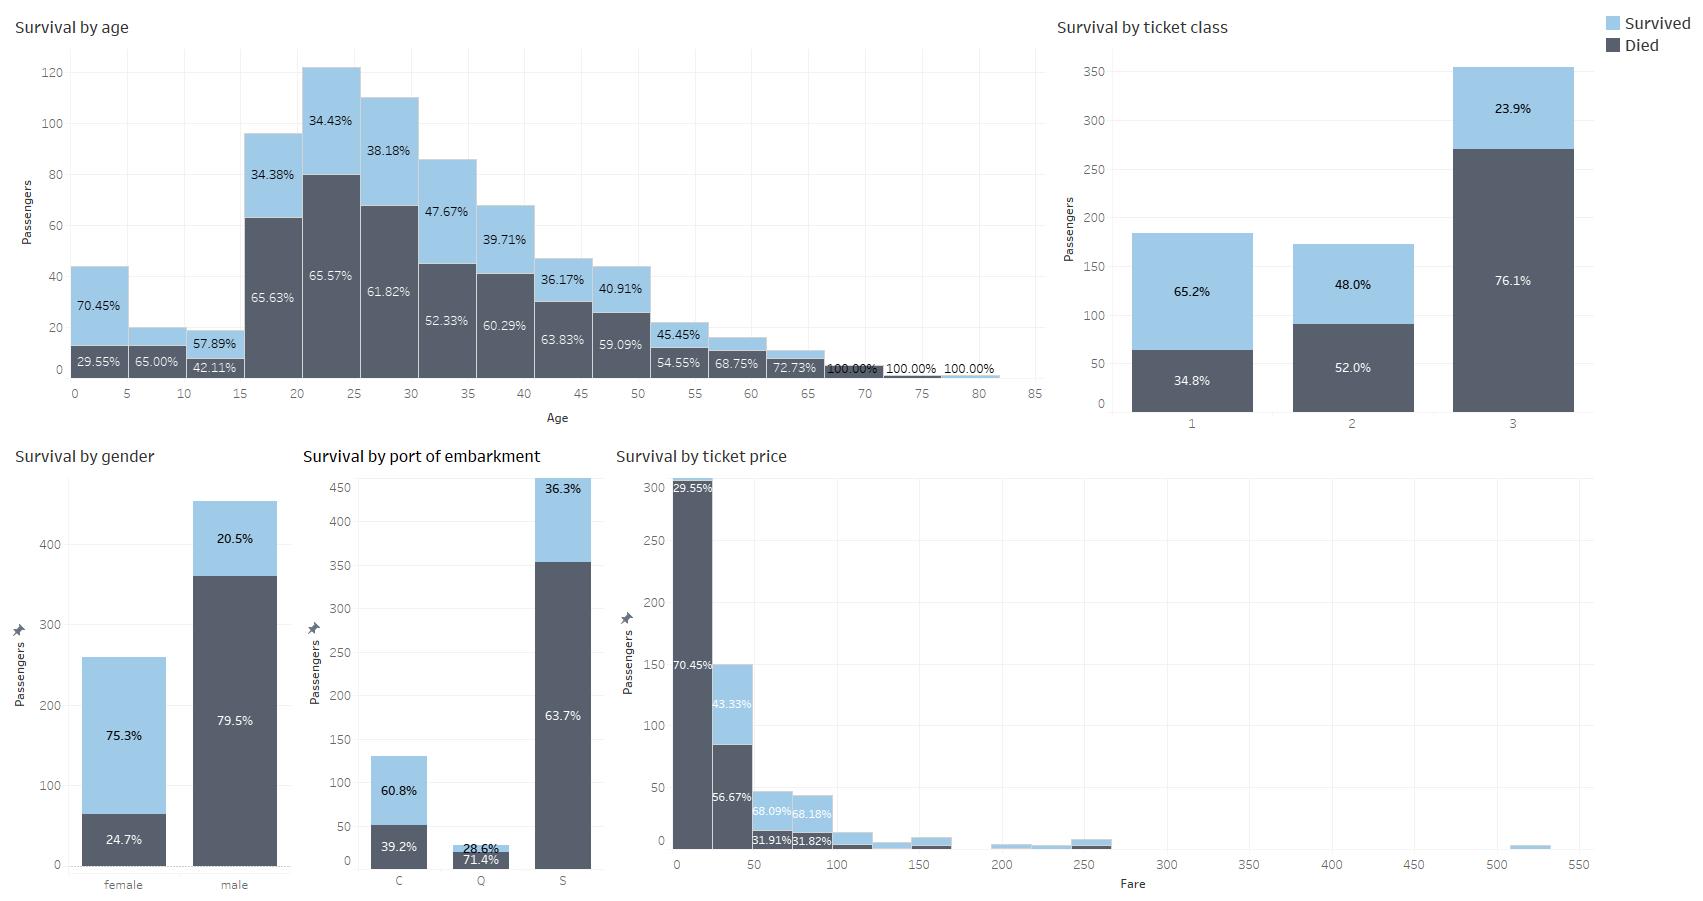

In [11]:
# Survival by age, ticket class, gender, port of embarkment and ticket price
from IPython import display
display.Image(r"C:\Users\Petra\Documents\DataScience\analysis\titanic\graphs\Dashboard1.png")

[Click here to view the graphs interactively](https://public.tableau.com/app/profile/petra.galicz/viz/Book1_16243091916960/Dashboard1)

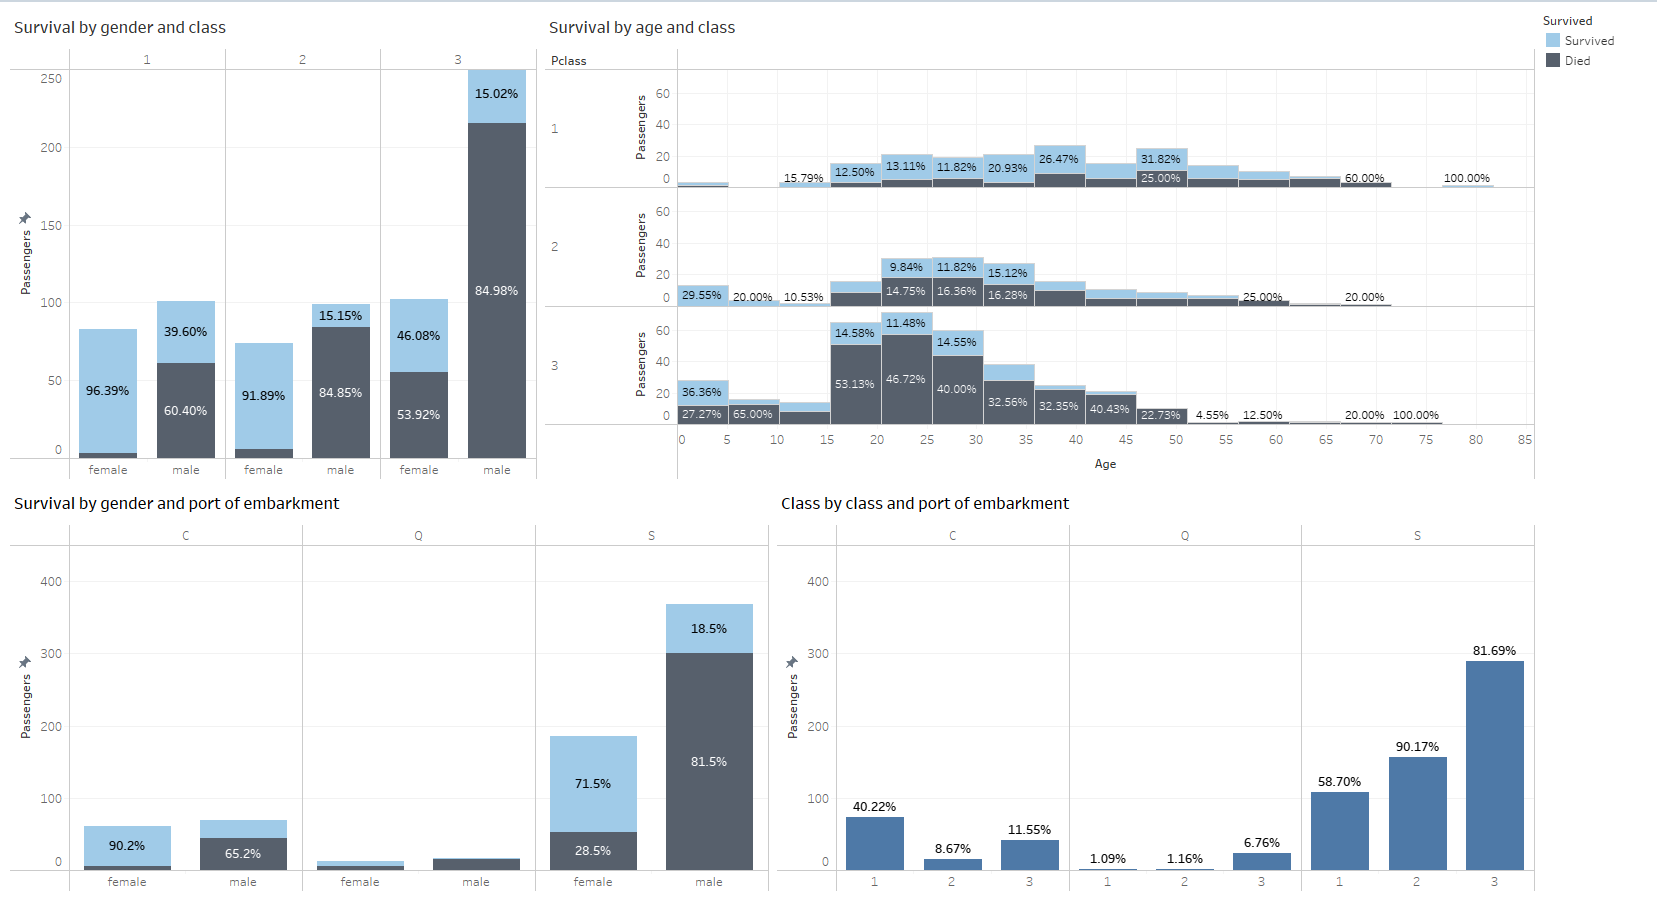

In [7]:
# Breaking down further
# survival by gender and class, age and class, gender and embarkment, class and embarkment 
from IPython import display
display.Image(r"C:\Users\Petra\Documents\DataScience\analysis\titanic\graphs\Dashboard2.png")

[Click here to view the graphs interactively](https://public.tableau.com/app/profile/petra.galicz/viz/Book2_16243474041480/Dashboard2)

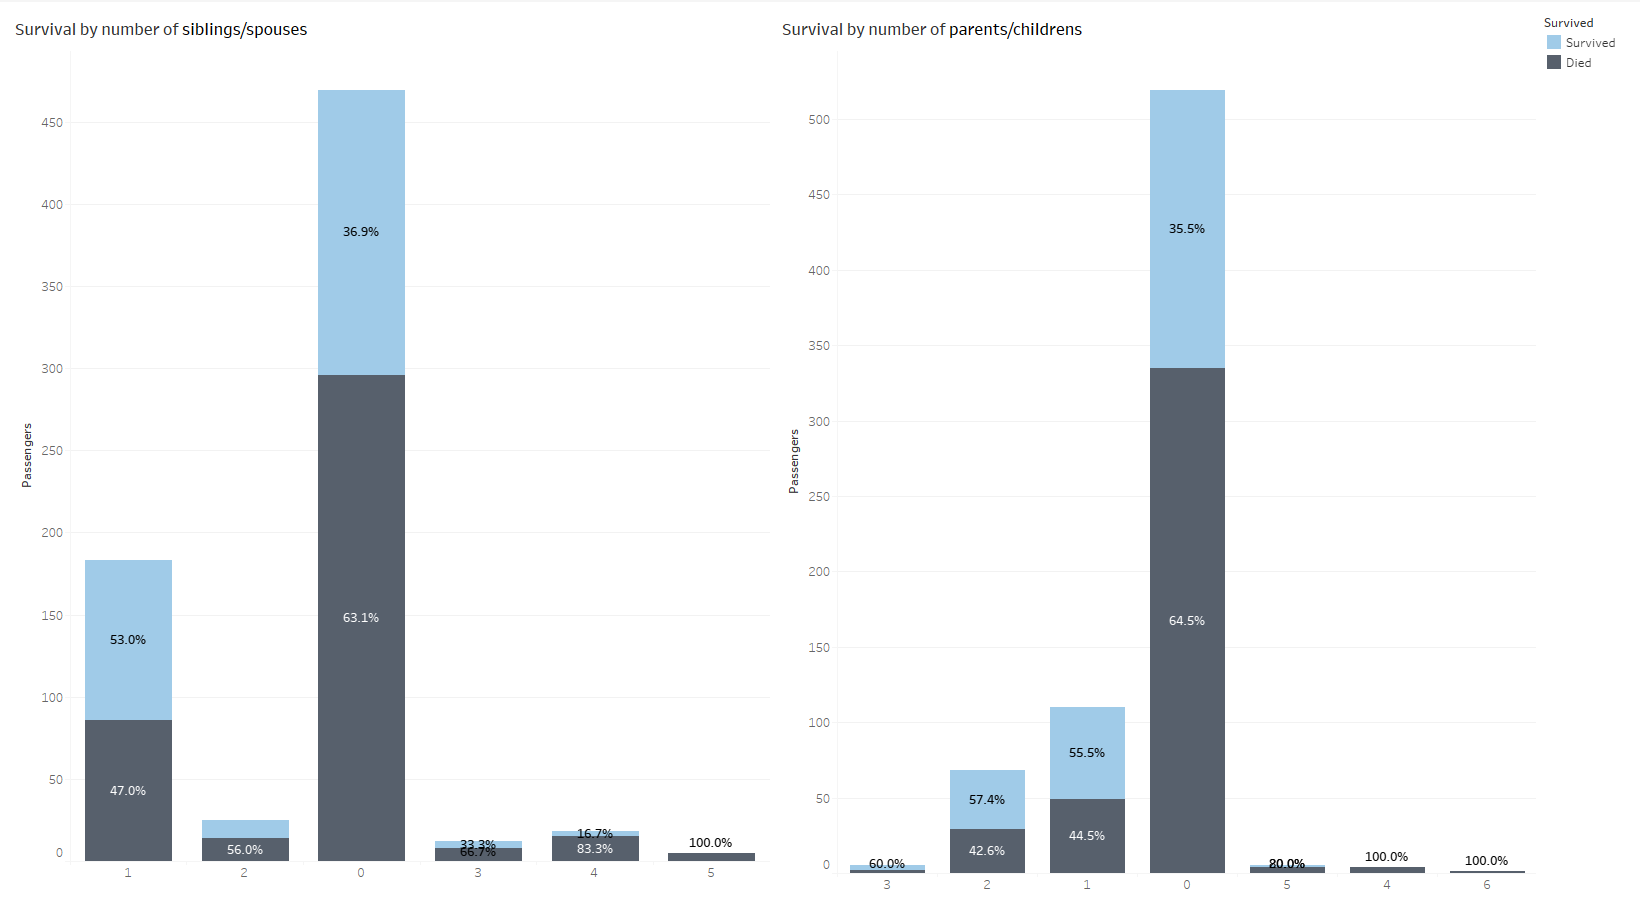

In [8]:
# Survival by number of siblings/spouses and number of parents/children
from IPython import display
display.Image(r"C:\Users\Petra\Documents\DataScience\analysis\titanic\graphs\Dashboard3.png")

[Click here to view the graphs interactively](https://public.tableau.com/app/profile/petra.galicz/viz/Book3_16243520975910/Dashboard3)

Now that we have a lot better understanding of who survived and died in the tragedy, let's prepare our data for the predicition models 

<div style="font-size: 19px">
Data wrangling

In [74]:
# rounding the floating point values 
train_table = train_table.round({'Fare': 1, 'Age': 1})

# creating bins for continuous values based on the precentiles
train_table[['Fare']].describe(include=[np.number])

# Fare
train_table.loc[train_table['Fare'] <= 8, 'Fare'] = 0
train_table.loc[(train_table['Fare'] > 8) & (train_table['Fare'] <= 15.65), 'Fare'] = 1
train_table.loc[(train_table['Fare'] > 15.65) & (train_table['Fare'] <= 33), 'Fare']   = 2
train_table.loc[train_table['Fare'] > 33, 'Fare'] = 3

# casting Fare values as int for the model:
train_table['Fare'] = train_table['Fare'].astype(int)

# checking the survival rate by the new Fare categories
train_table[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean()

,Fare,Survived
0,0,0.204188
1,1,0.321212
2,2,0.486034
3,3,0.615819


In [75]:
# for Age based on the visualisation, it's preferable to create 5 bins rather than 4
train_table['Age_bin'] = pd.cut(train_table['Age'].astype(int), 5)

# checking the survival rate by the new Age categories
train_table[['Age_bin', 'Survived']].groupby(['Age_bin'], as_index=False).mean()

,Age_bin,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.370690
2,"(32.0, 48.0]",0.400000
3,"(48.0, 64.0]",0.426471
4,"(64.0, 80.0]",0.090909


In [76]:
# Age
train_table.loc[ train_table['Age'] <= 16, 'Age'] = 0
train_table.loc[(train_table['Age'] > 16) & (train_table['Age'] <= 32), 'Age'] = 1
train_table.loc[(train_table['Age'] > 32) & (train_table['Age'] <= 48), 'Age'] = 2
train_table.loc[(train_table['Age'] > 48) & (train_table['Age'] <= 64), 'Age'] = 3
train_table.loc[(train_table['Age'] > 64), 'Age'] = 4

# dropping Name and Age bin as it is not needed for the model
train_table = train_table.drop(columns=['Name','Age_bin'])


In [77]:
# creating one variable called single, out of the features SibSp and Parch
train_table['Single'] = 0
train_table.loc[train_table['SibSp'] + train_table['Parch'] == 0, 'Single'] = 1

In [78]:
# Converting categorical values into numeric:

# embarked
emb_val = {'C': 0, 'Q': 1, 'S': 2}
train_table['Embarked'] = train_table['Embarked'].map(emb_val)

# sex
sex_val = {'male': 0, 'female': 1}
train_table['Sex'] = train_table['Sex'].map(sex_val)


<div style="font-size: 19px">
Preparing test data for the model, same steps as with the train table

In [79]:
# reading the train.csv file into a pandas DataFrame:
test_table = pd.read_csv('test.csv')

# dropping unnecessary columns
test_table = test_table.drop(columns=['Cabin', 'Ticket', 'Name'])

# dropping all the rows which contain any missing values
test_table = test_table.dropna()

# converting categorical values into numeric:
test_table['Embarked'] = test_table['Embarked'].map(emb_val)
test_table['Sex'] = test_table['Sex'].map(sex_val)

# creating Single variable
test_table['Single'] = 0
test_table.loc[test_table['SibSp'] + test_table['Parch'] == 0, 'Single'] = 1

# rounding the floating values
test_table = test_table.round({'Fare': 1, 'Age': 1})

# creating Fare bins
test_table.loc[test_table['Fare'] <= 8, 'Fare'] = 0
test_table.loc[(test_table['Fare'] > 8) & (test_table['Fare'] <= 15.65), 'Fare'] = 1
test_table.loc[(test_table['Fare'] > 15.65) & (test_table['Fare'] <= 33), 'Fare']   = 2
test_table.loc[test_table['Fare'] > 33, 'Fare'] = 3

# casting Fare values as int for the model:
test_table['Fare'] = test_table['Fare'].astype(int)

# Age
test_table.loc[ test_table['Age'] <= 16, 'Age'] = 0
test_table.loc[(test_table['Age'] > 16) & (test_table['Age'] <= 32), 'Age'] = 1
test_table.loc[(test_table['Age'] > 32) & (test_table['Age'] <= 48), 'Age'] = 2
test_table.loc[(test_table['Age'] > 48) & (test_table['Age'] <= 64), 'Age'] = 3
test_table.loc[(test_table['Age'] > 64), 'Age'] = 4

<div style="font-size: 19px">
Machine Learning models

I'm going to use the two most common machine learning models, logistic regression and random forest for the prediction, and see which performs better



In [80]:
# For the models I'm going to use the following independent variables or in other name features:
# features
x = train_table[['Sex', 'Pclass', 'Embarked', 'Fare', 'Age', 'Single']]

# And of course the dependent variable, the label is whether the person survived or not
# label
y = train_table['Survived']

# Creating the test set from the test table:
x_test = test_table[['Sex', 'Pclass', 'Embarked', 'Fare', 'Age', 'Single']]

 <div style="font-size: 16px">
 At first, the regression:

By the [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression) definition, logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. Logistic regression is needed in our model as unlike ordinary linear regression, logistic regression is used for predicting dependent variables that take a limited number of categories rather than a continuous outcome.

In [81]:
# importing library for the model
from sklearn.linear_model import LogisticRegression

# Create a Classifier
clf = LogisticRegression()

# Train the model using the training data
clf.fit(x, y)

# predict for test data
y_pred_reg = clf.predict(x_test)

# checking the mean training accuracy accuracy of the model
accuracy_reg= round(clf.score(x, y) * 100, 2)
print("Accuracy: ", accuracy_reg)

Accuracy:  79.21


<div style="font-size: 16px">
Secondly, the random forest model:

Random forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.
(source: [Wikipedia](https://en.wikipedia.org/wiki/Random_forest))

In [82]:
# importing library for the model
from sklearn.ensemble import RandomForestClassifier

# Create a Classifier
clf=RandomForestClassifier(n_estimators=100)

# Train the model using the training data
clf.fit(x,y)

# predict for test data
y_pred_random=clf.predict(x_test)

# checking the mean training accuracy accuracy of the model
accuracy_random_forest = round(clf.score(x, y) * 100, 2)
print("Accuracy: ", accuracy_random_forest)

Accuracy:  86.24


In [83]:
# Since the random forest model perfomed way better, I'm saving that result:
output_random_forest = pd.DataFrame({'PassengerId': test_table.PassengerId, 'Survived': y_pred_random})
output_random_forest.to_csv('my_submission_random_forest.csv', index=False)